# Question 1: Phân lớp chủ đề các bài báo

In [ ]:
!pip install requests beautifulsoup4
!pip install pyvi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from pyvi import ViTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from bs4 import BeautifulSoup
import requests
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
url_data = pd.read_excel('/content/drive/MyDrive/MCS/Deep Learning/Week 1/Homework1/Homework1_DATA.xlsx')
print(url_data)

In [ ]:
X_raw = []
Y_raw = []
for _, row in url_data.iterrows():
    url = row['url']
    print(url)
    html_content = requests.get(url).text
    soup = BeautifulSoup(html_content, "lxml")
    # data = soup.find("section", attrs={"class": "section page-detail top-detail"}).find_all('p', attrs={"class": "Normal"})
    data = soup.find_all('p', attrs={"class": "Normal"})
    content = ""
    for element in data:
      # print(element.get_text())
      content += element.get_text()
    print(content)
    sentences = content.split(".")
    print('sentences: ', sentences)
    #raw data
    X_raw = X_raw + sentences
    Y_raw = Y_raw + [row['category']]*len(sentences)
    # print('len X_raw: ', len(X_raw))
    # print("X_raw: ", X_raw)
    # print('len X_raw: ', len(X_raw))

    # print("Y_raw: ", Y_raw)
    # Y_raw.append(row['category'])
    # break
    #Tokenize
    # content_token = ViTokenizer.tokenize(content).split(' ')
    # print(len(content_token))


In [ ]:
print(len(X_raw), len(Y_raw))
print(X_raw)
print(Y_raw)

1384 1384
['Ngày 16/5, Phó chủ tịch UBND Đồng Tháp Nguyễn Phước Thiện cho biết cơ quan chức năng hai nước tiếp tục trao đổi, thống nhất các bước để nhận sếu đầu đỏ ở vườn thú Nakhon Ratchasima (tỉnh Nakhon), cùng các giải pháp giúp sếu thích nghi điều kiện sống mới', ' Hiện, vườn quốc gia Tràm chim chuẩn bị xong khu vực chăm sóc sếu, cử cán bộ sang Thái Lan học tập kinh nghiệm', 'Sếu đầu đỏ thuộc động vật quý hiếm nên việc chuyển giao phải qua nhiều công đoạn', ' Bên tiếp nhận sếu có trách nhiệm bồi hoàn một khoản kinh phí tượng trưng cho công tác chăm sóc, thuần dưỡng (không được xem là mua bán)', ' Ngoài ra, sếu được xem là "quốc bảo" của người Thái, do đó đại diện vườn thú của họ sẽ chọn hai động vật ở Việt Nam để tiến hành trao đổi', 'Theo ông Thiện, theo lộ trình cặp sếu đầu tiên sẽ được vườn thú ở Thái Lan chuyển giao cho Đồng Tháp năm 2024', ' Đây là hai sếu trưởng thành 6 tháng tuổi, đang trong giai đoạn trưởng thành', ' Địa phương kỳ vọng 4 năm tới tiếp nhận khoảng 20 sếu, vừa

In [ ]:
#IF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_raw)
Y = np.array(Y_raw)

#number category
le = preprocessing.LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(X.shape)
print(Y)

(1384, 2505)
[4 4 4 ... 0 0 0]


In [ ]:
#Đánh giá trên KNN với kfold = 5
kfold = model_selection.KFold(n_splits=5)
cv_results = model_selection.cross_val_score(KNeighborsClassifier(), X, Y, cv=kfold, scoring='accuracy')
print(cv_results.mean())

0.2101083032490975


In [ ]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1107, 2505)
(277, 2505)
(1107,)
(277,)


In [ ]:
bayes = KNeighborsClassifier()
bayes.fit(X_train, y_train)
predictions = bayes.predict(X_test)
print(accuracy_score(y_test, predictions))
print("\t=============================================\n")
print(confusion_matrix(y_test, predictions))
print("\t=============================================\n")
print(f1_score(y_test, predictions, average=None))

0.23826714801444043

[[ 6 61  0  0  0]
 [ 0 57  0  0  0]
 [ 0 43  1  1  0]
 [ 0 41  0  0  0]
 [ 0 65  0  0  2]]

[0.16438356 0.35185185 0.04347826 0.         0.05797101]


# Question 2: Hãy thực hiện Bài tập số 4 trong slide ANN

In [ ]:
W = np.array([[1,2,3],[5,4,6]])
b = np.array([0.5,0.6])
p = np.array([2,1.5,3])
n= W@p + b
print(n)
f = 1/(1+np.exp(-n))
print(f)

[14.5 34.6]
[0.9999995 1.       ]


In [ ]:
# Question 3: Hãy thực hiện Bài tập số 4 trong slide ANN

# Question 3: Cho một mạng truyền thẳng 2 lớp như hình vẽ. Trong đó, lớp đầu vào có 3 nơ-ron nhận giá trị trong khoảng [-1, 1]; lớp thứ hai có 8 nơ-ron và lớp đầu ra có 2 nơ-ron tuyến tính.

Giả sử, ta có:
X=[1-1 0.5];
W1=[1 -1 2; -1 1 1;-2 -1 1; 1 1 2; -1 2 1; -2 -1 1; 1 1 2; 2 2 1]
b1= [-1 2 -2 1 2 1  -1 1];

W2=[-1 1 2 2 1 1 2 1; -2 -2 -1 1 1 2 -1 1];
b2=[-1 1];

Chạy thực nghiệm với các thông số trên.

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def linear(x):
    return x

# Đầu vào
X = np.array([1, -1, 0.5])

# Trọng số và bias của lớp 1
W1 = np.array([[1, -1, 2],
               [-1, 1, 1],
               [-2, -1, 1],
               [1, 1, 2],
               [-1, 2, 1],
               [-2, -1, 1],
               [1, 1, 2],
               [2, 2, 1]])

b1 = np.array([-1, 2, -2, 1, 2, 1, -1, 1])

# Trọng số và bias của lớp 2
W2 = np.array([[-1, 1, 2, 2, 1, 1, 2, 1],
               [-2, -2, -1, 1, 1, 2, -1, 1]])

b2 = np.array([-1, 1])

# Tính toán đầu ra của lớp 1
Z1 = np.dot(W1, X) + b1
A1 = sigmoid(Z1)

# Tính toán đầu ra của lớp 2
Z2 = np.dot(W2, A1) + b2
A2 = linear(Z2)

print("Đầu ra của mạng truyền thẳng:")
print(A2)


Đầu ra của mạng truyền thẳng:
[3.47254725 0.73845989]


# Question 4: Cho các hàm Activation Function: Sigmoid, Tand, Relu, Leaky Relu, Maxout, ELU
- Hãy lập trình viết mỗi hàm thành một function riêng.
- Với mỗi hàm hãy vào dữ liệu và trực quan hóa các hàm đó theo dữ liệu mà bạn đã vào

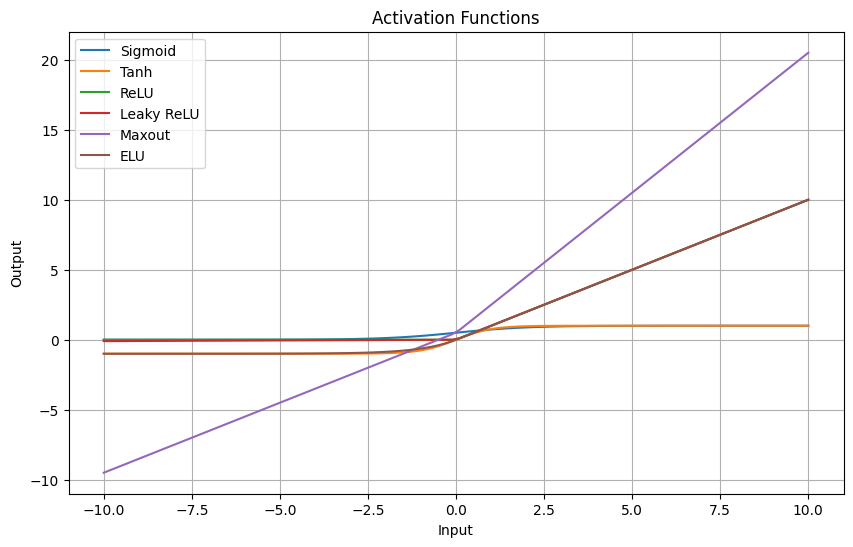

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def maxout(x, w, b):
    z = np.dot(x, w) + b
    return np.max(z, axis=1)

def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

# Dữ liệu mẫu
x = np.linspace(-10, 10, 100).reshape(-1, 1)  # Reshape x thành ma trận cột

# Áp dụng các hàm kích hoạt vào dữ liệu mẫu
sigmoid_output = sigmoid(x)
tanh_output = tanh(x)
relu_output = relu(x)
leaky_relu_output = leaky_relu(x)
maxout_output = maxout(x, np.array([[1, 2]]), np.array([0.5]))
elu_output = elu(x)

# Trực quan hóa các hàm kích hoạt
plt.figure(figsize=(10, 6))
plt.plot(x, sigmoid_output, label='Sigmoid')
plt.plot(x, tanh_output, label='Tanh')
plt.plot(x, relu_output, label='ReLU')
plt.plot(x, leaky_relu_output, label='Leaky ReLU')
plt.plot(x, maxout_output, label='Maxout')
plt.plot(x, elu_output, label='ELU')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.title('Activation Functions')
plt.grid(True)
plt.show()
